В файле test_2 лежит результат теста, который был нацелен на увеличение суммы чека клиента. 
Выясним  увеличилась сумма чека или нет.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pd.read_csv('test_2.csv')

In [4]:
data.tail()

,group,client_id,avg_sum
595,control,596,209.075972
596,control,597,57.990291
597,control,598,42.577037
598,control,599,178.320097
599,control,600,78.746824


In [5]:
data.groupby("group").agg({'client_id':'count'})

,client_id
group,
control,294
test,306


In [6]:
A=data[0:306] 
B=data[306::]


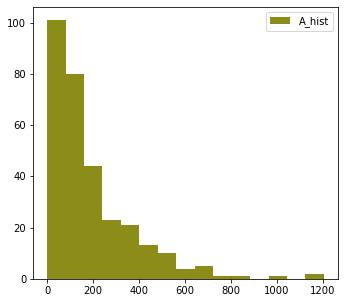

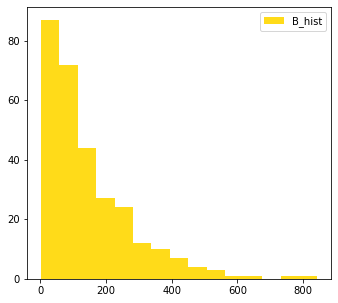

In [7]:
#Посмотрим как распредлены суммы в подвыборках
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(A['avg_sum'],
           bins = 15,
           color = 'olive',
           alpha = 0.9,
           label = 'A_hist')
pylab.legend()

pylab.figure(figsize(12, 5))
pylab.subplot(1,2,2)
pylab.hist(B['avg_sum'],
           bins = 15,
           color = 'gold',
           alpha = 0.9,
           label = 'B_hist')
pylab.legend()
pylab.show()


In [8]:
#Значит в нашем случае экспоненциально, применим критерий Манна-Уитни, где H_0="выборки однородны",H_1="одна из них доминирует"
new=data.sort_values('avg_sum')
new['rank']=new['avg_sum'].rank(ascending = True, numeric_only = True)
new.head()

,group,client_id,avg_sum,rank
135,test,136,0.277584,1.0
219,test,220,0.873561,2.0
459,control,460,1.122632,3.0
105,test,106,2.911767,4.0
182,test,183,3.210035,5.0


In [9]:
rank_sum=new.groupby('group')['rank'].sum()
rank_sum

group
control    82386.0
test       97914.0
Name: rank, dtype: float64

In [10]:
# разделяем обратно на 2 выборки
Anew = new[new['group'] == 'control']['avg_sum']
Bnew = new[new['group'] == 'test']['avg_sum']
Arank = new[new['group'] == 'control']['rank'].sum()
Brank = new[new['group'] == 'test']['rank'].sum()

In [11]:
#Вычислим статистику критерия U:
n1=Anew.count()
n2=Bnew.count()
N = n1 * n2 #N1*N2
max_rank = max(Arank,Brank) 
max_count = float() 
if Arank > Brank:
    max_count = n1
    print("A")
else:
    max_count = n2
    print("B")
U=N + (max_count * (max_count + 1))/2 - max_rank
U

B


39021.0

In [12]:
#Найдем z и p-value
m_u = n1*n2/2 
sigma = sqrt((n1*n2)*(n1+n2+1)/12)
z= (U - m_u)/sigma
p_value = stats.norm.cdf(z) 
if p_value > 0.05:
    print('Нет статистически значимой разницы и оснований отвергнуть гипотезу H0','\nU-критерий:',U,
              '\nz_score',z,'\np-value',round(p,4))
else:
    print('Есть статистически значимая разница, гипотеза H0 отвергается','\nU-критерий:',U,
              '\nz_score',z,'\np-value',round(p_value,4))

      


Есть статистически значимая разница, гипотеза H0 отвергается 
U-критерий: 39021.0 
z_score -2.808265278778519 
p-value 0.0025


In [13]:
#Значит, сумма чека изменилась. Точнее, увеличилась.

In [24]:
A.sum()

group        testtesttesttesttesttesttesttesttesttesttestte...
client_id                                                46971
avg_sum                                           58095.828627
dtype: object

In [25]:
B.sum()

group        controlcontrolcontrolcontrolcontrolcontrolcont...
client_id                                               133329
avg_sum                                           42574.237518
dtype: object